# COMP4115: Exploratory Data Analysis and Visualization
# Lab6. Usage of scikit-learn for Data Classification and Regression

# scikit-learn: Machine Learning in Python

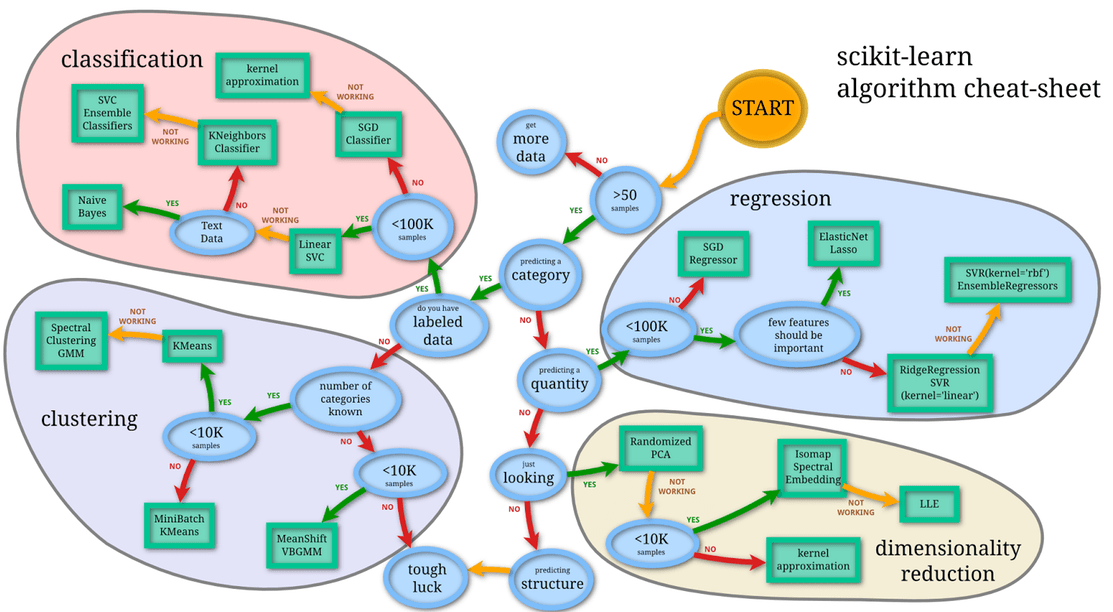

# 1. Classification

## 1.1 Perceptron Algorithm in Sklearn

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [2]:
from sklearn.linear_model import Perceptron

X = df.drop(['species'], axis=1).values
y = np.ones(df.shape[0])
y[df['species']!='versicolor'] = -1

# Split X and y into training and testing sets 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

ppn = Perceptron(max_iter=100)

# Train the perceptron
ppn.fit(X_train, y_train)

y_pred = ppn.predict(X_test)

print("test accuracy: " + str(sum(y_test == y_pred)/len(y_pred)))

test accuracy: 0.833333333333


## 1.2 Cross validation with SVM

In [3]:
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

svm_classifier = SVC()

cv_accuracy = cross_val_score(svm_classifier, X, y, scoring='accuracy', cv = 5)
print(cv_accuracy)
print(cv_accuracy.mean())

[ 1.          1.          0.93333333  0.8         0.83333333]
0.913333333333


In [4]:
# a different parameter seting for RBF svm
svm_classifier = SVC(C = 100, gamma = 'auto')

cv_accuracy = cross_val_score(svm_classifier, X, y, scoring='accuracy', cv = 5)
print(cv_accuracy)
print(cv_accuracy.mean())

[ 1.          1.          0.86666667  0.9         0.93333333]
0.94


In [5]:
# A different parameter setting for SVM: linear SVM with C euqual to 5
svm_classifier = SVC(C=5, kernel = 'linear')
print(cross_val_score(svm_classifier, X, y, scoring='accuracy', cv = 5))
print(cross_val_score(svm_classifier, X, y, scoring='accuracy', cv = 5).mean())

[ 0.76666667  0.83333333  0.56666667  0.53333333  0.7       ]
0.68


## 1.3 Cross validation with Neural network

In [6]:
from sklearn.neural_network import MLPClassifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(50,), activation='relu', learning_rate_init = 0.01, max_iter=400)

cv_accuracy = cross_val_score(mlp_classifier, X, y, scoring='accuracy', cv = 5)
print(cv_accuracy)
print(cv_accuracy.mean())

[ 1.          1.          0.96666667  0.96666667  0.96666667]
0.98


## 1.4 Cross validation with KNN

In [7]:
from sklearn.neighbors import KNeighborsClassifier
KNN_classifier = KNeighborsClassifier(n_neighbors=3)
print(cross_val_score(KNN_classifier, X, y, scoring='accuracy', cv = 5))
print(cross_val_score(KNN_classifier, X, y, scoring='accuracy', cv = 5).mean())

[ 1.          1.          0.9         0.93333333  0.96666667]
0.96


# 2. Regression

## 2.1. Implementation of Linear Regression


Let us consider the simplest form of a linear regression model (i.e., fitting a straight line to one-dimensional data). This simple model can be extended to model more complicated data behavior.

We will start with the most familiar linear regression, a straight-line fit to data.
A straight-line fit is a model of the form
$$
y = wx + b
$$
where $w$ is commonly known as the *slope*, and $b$ is commonly known as the *intercept* (also known as *bias*).

Consider the following data, which is scattered about a line with a slope of 2 and an intercept of -5:

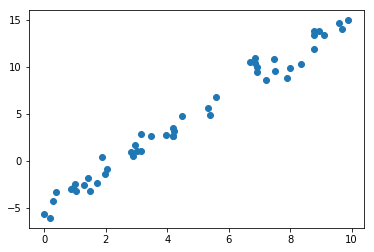

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)          # randomly generated input x
y = 2 * x - 5 + rng.randn(50)  # use w*x + b + noise to generated output y
plt.scatter(x, y);

Solution for Linear Regression
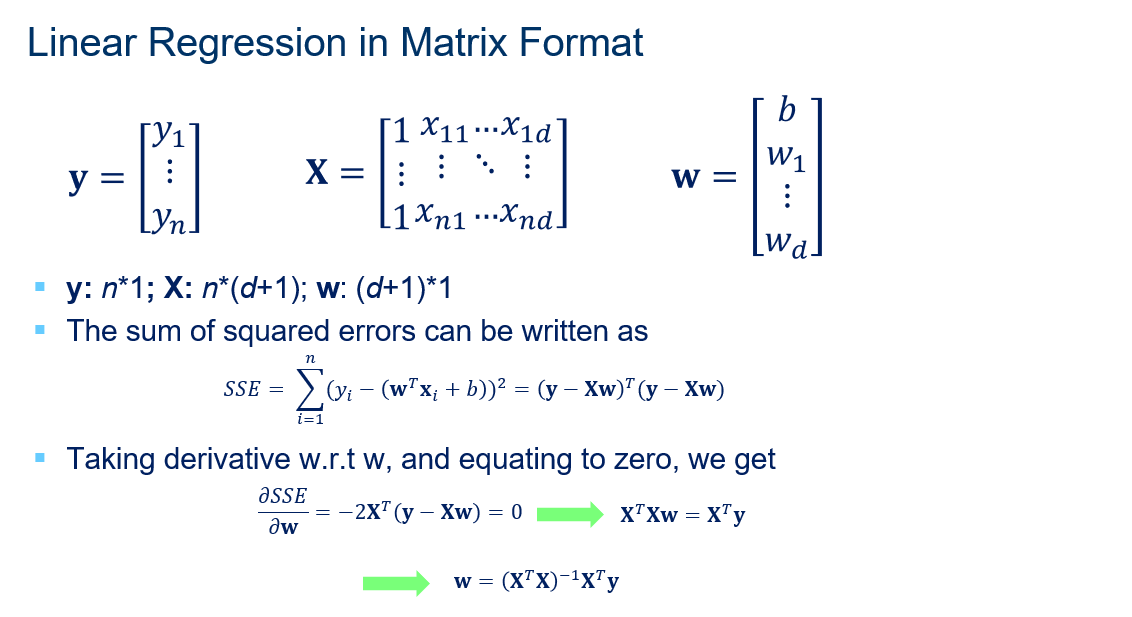

In [9]:
# Implementation of Linear Regression

def my_lr_train(X_train, y_train):
    X_train = np.c_[np.ones(X_train.shape[0]), X_train.copy()] # add a constant cloumns with all elements equal to one
    w = np.dot(np.linalg.inv(np.dot(np.transpose(X_train), X_train)),np.dot(np.transpose(X_train),y_train))
    return w

w = my_lr_train(x, y)

print("Model slope:    ", w[1])
print("Model intercept:", w[0])

Model slope:     2.02720881036
Model intercept: -4.99857708555


We see that the results are very close to the expected values. 

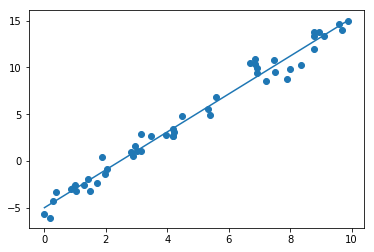

In [10]:
# Plot the line 
xfit = np.array([x.min(), x.max()])
yfit = np.dot(np.c_[np.ones(xfit.shape[0]), xfit.copy()], w)

plt.scatter(x, y)
plt.plot(xfit, yfit);

## 2.2 Linear and Ridge Regression in Scikit-learn

Regression model slope:     [ 2.02720881]
Regression model intercept: -4.99857708555


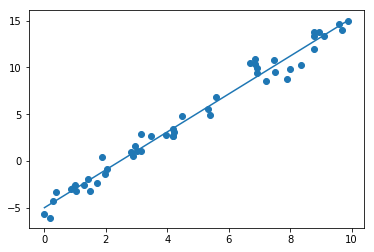

In [11]:
# linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

print("Regression model slope:    ", model.coef_)
print("Regression model intercept:", model.intercept_)

xfit = np.array([x.min(), x.max()])
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

## 2.3. Case study: Predict Housing Price by Linear Regression

In [12]:
import pandas as pd
df = pd.read_csv('boston_house_dataset.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Boston House Data Description
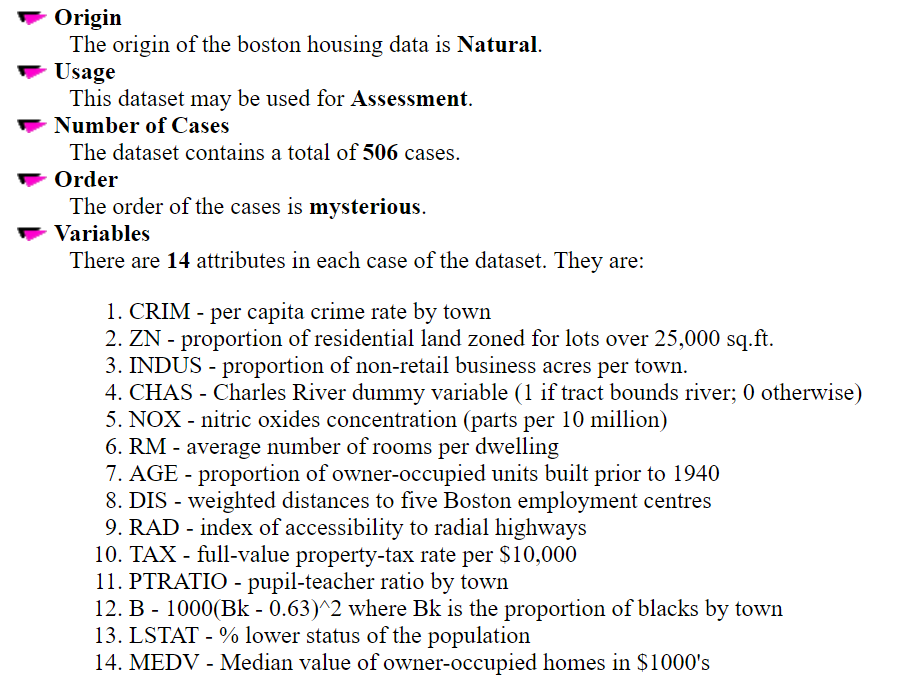

In [13]:
# Split the data for training and test
X = df.drop(['MEDV'], axis=1).values
y = df['MEDV'].values
from sklearn.model_selection import train_test_split


X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state=5)
lr_model = LinearRegression(fit_intercept=True)
lr_model.fit(X_train, Y_train)

y_pred = lr_model.predict(X_test)

### Evaluation Metrics for Regression
https://scikit-learn.org/stable/modules/model_evaluation.html
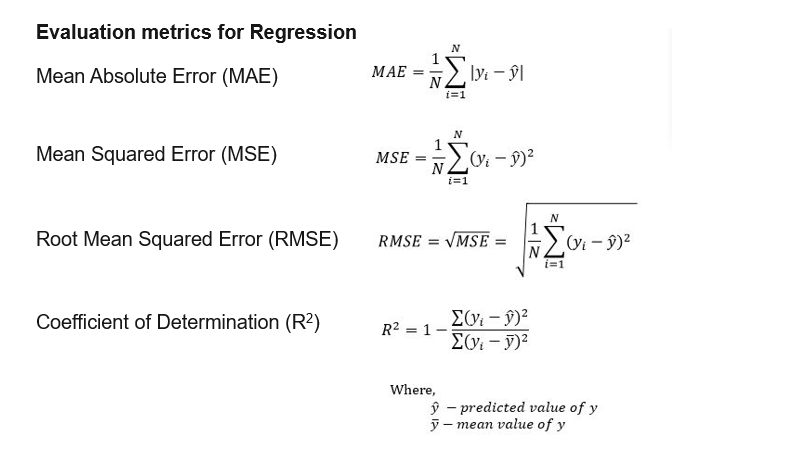

In [14]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

mae = mean_absolute_error(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, y_pred)
print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE:", rmse)
print("R2 Score: ", r2)

MAE:  3.21327049584
MSE:  20.8692921838
RMSE: 4.5682920423
R2 Score:  0.733449214745


### Cross validation with Linear Regression

In [15]:
from sklearn.model_selection import cross_val_score
lr_model = LinearRegression(fit_intercept=True)
n_mse = cross_val_score(lr_model, X, y, cv=10, scoring = 'neg_mean_squared_error')
print(n_mse)
print(n_mse.mean())

[  -9.28694671  -14.15128316  -14.07360615  -35.20692433  -31.88511666
  -19.83587796   -9.94726918 -168.37537954  -33.32974507  -10.96041068]
-34.7052559445


### Cross validation with Ridge Regression

In [16]:
from sklearn.linear_model import Ridge

alphas = [0, 1, 10, 100, 1000]

for alpha_i in alphas:
    ridge_model = Ridge(fit_intercept=True, alpha=alpha_i)
    cv_mse = cross_val_score(ridge_model, X, y, scoring='neg_mean_squared_error', cv = 10).mean()
    print('alpha: ', alpha_i, ', negative mean squared error: ', cv_mse)

alpha:  0 , negative mean squared error:  -34.7052559445
alpha:  1 , negative mean squared error:  -34.0782462093
alpha:  10 , negative mean squared error:  -33.0058177937
alpha:  100 , negative mean squared error:  -29.6152200973
alpha:  1000 , negative mean squared error:  -32.0796253003
